# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

### Answer for 1.1

### Correlation Heatmap

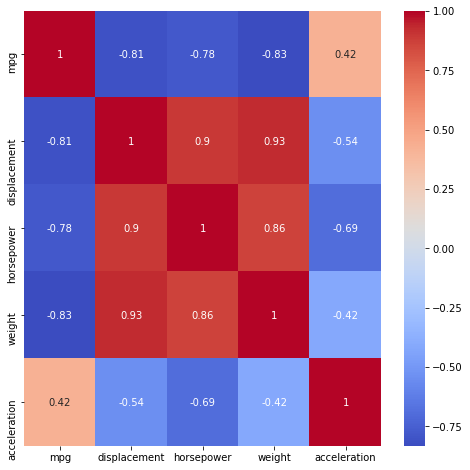

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
dataframe=pd.read_csv('auto-mpg.csv')
plt.figure(figsize=(8,8))
sb.heatmap(dataframe.corr(),annot=True,cmap="coolwarm") #coolwarm is the way to identify its correlation, darker the more correlation,the lighter less correlation

x = dataframe["horsepower"]
y = dataframe["mpg"]


Answer: If we are going to use SimpleLinearRegression, the most unlikely attribute to use is the acceleration because the lowest correlation value.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

### Answer 1.2 

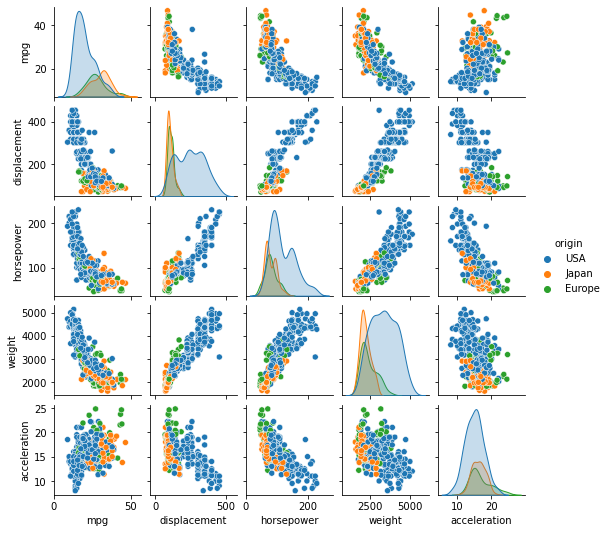

In [8]:
#compare  pairplot and heatmap positive and negative correlations
df_pairplot=dataframe.dropna()
sb.pairplot(df_pairplot,height=1.5,hue="origin")


#### Answer to the which linear regression on which way is the best to predict mpg by using horsepower

If we are going to predict mpg by using horsepower, I would say the best is PolynomialRegression because the distrribution itself looks polynomial. The reason why,we cant use Logistic Regression is because it doesnt have classification. 

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

### Answer 2.1

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler


df=dataframe.drop(columns=['origin'])
max_scaler=MaxAbsScaler()
max_scaler.fit(df)
sc_data=max_scaler.transform(df)
data_scaled= pd.DataFrame(sc_data,columns=df.columns)

train,test=train_test_split(data_scaled,test_size=0.2) # splitting into 80:20 ratio


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

### Answer 2.2

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


train, test = train_test_split(df, test_size=0.2, random_state=21)

X_train, X_test = train['horsepower'], test['horsepower']
y_train, y_test = train['mpg'], test['mpg']

lr = LinearRegression(normalize=True)
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1)) # reshape=array of to get reshape
predicted = lr.predict(np.asarray(X_test).reshape(-1,1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, y_test),4)}')


Testing MSE error is: 23.2049


### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


Degree 2

Training RMSE: 4.216741943851994

Test RMSE: 6.621382611395274


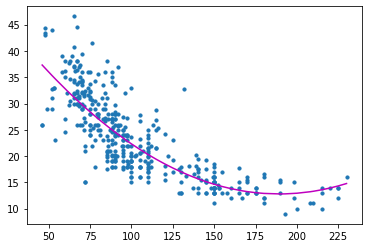

Degree 3

Training RMSE: 4.209627581258977

Test RMSE: 6.649499031022588


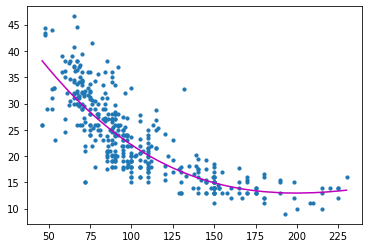

Degree 4

Training RMSE: 4.204468375820911

Test RMSE: 6.610256481511094


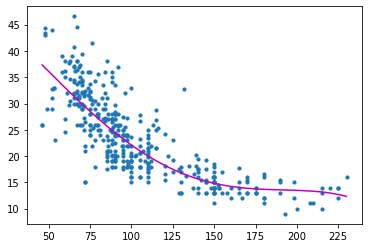

In [11]:
#Constructing a 2nd order Polynomial Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# transforming the data to include another axis
x1 = dataframe["horsepower"]
y1 = dataframe["mpg"]
x.shape
x=x1.values.reshape(-1,1)


print("Degree 2")
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)


x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)




rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)


# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


print("Degree 3")


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)




rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


print("Degree 4")
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)




rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)


# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()




I think there is a sign of overfitting, because as you notice from the polynomial regression itself, the plots is tend to force to fit the data. 

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (10 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




dataset= dataframe.drop(dataframe[dataframe['origin']=='Europe'].index)

#split data into 80:20
train, test = train_test_split(dataset, test_size=0.2, random_state=21)




### Exercise 3.2 - Logistic Regression (30 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_train, y_train = train.drop(columns=['origin']), train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']


scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




lor = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_train, lor.predict(X_train)))
print(classification_report(y_test, lor.predict(X_test)))

              precision    recall  f1-score   support

       Japan       0.74      0.78      0.76        58
         USA       0.93      0.92      0.93       201

    accuracy                           0.89       259
   macro avg       0.84      0.85      0.84       259
weighted avg       0.89      0.89      0.89       259

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



 **If we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**
 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



dataset= dataframe.drop(dataframe[dataframe['origin']=='USA'].index)

#split data into 80:20
train, test = train_test_split(dataset, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['origin']), train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']


scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




lor = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_train, lor.predict(X_train)))
print(classification_report(y_test, lor.predict(X_test)))




              precision    recall  f1-score   support

      Europe       0.68      0.57      0.62        56
       Japan       0.66      0.75      0.70        61

    accuracy                           0.67       117
   macro avg       0.67      0.66      0.66       117
weighted avg       0.67      0.67      0.66       117

              precision    recall  f1-score   support

      Europe       0.47      0.67      0.55        12
       Japan       0.69      0.50      0.58        18

    accuracy                           0.57        30
   macro avg       0.58      0.58      0.57        30
weighted avg       0.60      0.57      0.57        30



According to the data above between Japan and Europe, In terms of accuracy, drop to around 20%, it is because that Japan and Europe data has similar distributions. 